Mean Estimated Probability: 0.5003
Mean Confidence Interval: (0.3631, 0.6374)


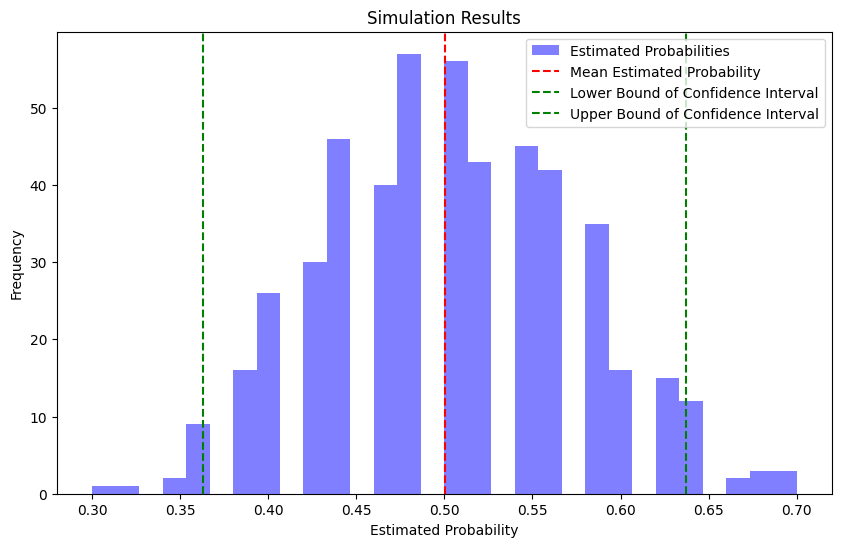

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Set the parameters for the experiment
num_simulations = 500
num_coin_flips = 50 
confidence_level = 0.95  

# Initialize lists to store estimated probabilities and confidence intervals
estimated_probs = []
confidence_intervals = []

# Simulate the experiment for the specified number of times
for _ in range(num_simulations):
    # Simulate coin flips (1 for heads, 0 for tails)
    coin_flips = np.random.randint(2, size=num_coin_flips)
    
    # Calculate the estimated probability of heads
    estimated_prob = np.mean(coin_flips)
    
    # Calculate the standard error
    std_error = np.sqrt(estimated_prob * (1 - estimated_prob) / num_coin_flips)
    
    # Calculate the margin of error based on the confidence level
    z_score = 1.96  # For a 95% confidence level
    margin_of_error = z_score * std_error
    
    # Calculate the confidence interval
    confidence_interval = (estimated_prob - margin_of_error, estimated_prob + margin_of_error)
    
    # Append the results to the lists
    estimated_probs.append(estimated_prob)
    confidence_intervals.append(confidence_interval)

# Calculate the mean estimated probability
mean_estimated_prob = np.mean(estimated_probs)

# Calculate the mean confidence interval
mean_confidence_interval = (
    np.mean([interval[0] for interval in confidence_intervals]),
    np.mean([interval[1] for interval in confidence_intervals])
)

# Print the results
print(f"Mean Estimated Probability: {mean_estimated_prob:.4f}")
print(f"Mean Confidence Interval: ({mean_confidence_interval[0]:.4f}, {mean_confidence_interval[1]:.4f})")

# Visualize the results
plt.figure(figsize=(10, 6))
plt.hist(estimated_probs, bins=30, alpha=0.5, color='blue', label='Estimated Probabilities')
plt.axvline(x=mean_estimated_prob, color='red', linestyle='--', label='Mean Estimated Probability')
plt.axvline(x=mean_confidence_interval[0], color='green', linestyle='--', label='Lower Bound of Confidence Interval')
plt.axvline(x=mean_confidence_interval[1], color='green', linestyle='--', label='Upper Bound of Confidence Interval')
plt.xlabel('Estimated Probability')
plt.ylabel('Frequency')
plt.legend()
plt.title('Simulation Results')
plt.show()